# Reducing the number of high fatality accidents

## 📖 Background
You work for the road safety team within the department of transport and are looking into how they can reduce the number of serious accidents. The safety team classes serious accidents as fatal accidents involving 3+ casualties. They are trying to learn more about the characteristics of these serious accidents so they can brainstorm interventions that could lower the number of deaths. They have asked for your assistance with answering a number of questions.

## 💾 The data
The reporting department have been collecting data on every accident that is reported. They've included this along with a lookup file for 2020's accidents.

*Published by the department for transport. https://data.gov.uk/dataset/road-accidents-safety-data* 
*Contains public sector information licensed under the Open Government Licence v3.0.*

<div class="alert alert-block alert-warning">
<b>How to use the Jupyter Notebook:</b>
    
- Please avoid running the cells individually, instead use 'Restart Kernel and Run All Cells' or 'Run All Above Selected Cell';
- Use Navigation links provided in the Table of Contents and in the end of each section;
- If you face any problem reading, try to Restart the Kernel.

# Table of Contents <a class="anchor" id="zero-bullet"></a>

* [1. Importing the libraries and preparing the data](#first-bullet)
* [2. What time of day and day of the week do most serious accidents happen? ](#second-bullet)
* [2.1. Conclusion for Section 2 ](#second-zero-bullet)
* [3. Are there any patterns in the time of day/ day of the week when serious accidents occur? ](#third-bullet)
* [3.1. Conclusion for Section 3 ](#third-zero-bullet)
* [4. What characteristics stand out in serious accidents compared with other accidents? ](#fourth-bullet)
* [4.1. Conclusion for Section 4 ](#fourth-zero-bullet)
* [5. On what areas would you recommend the planning team focus their brainstorming efforts to reduce serious accidents? ](#fifth-bullet)

# 1. Importing the libraries and data  <a class="anchor" id="first-bullet"></a>

<div class="alert alert-block alert-info">
Let's import all our csv files and preview them

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
accidents = pd.read_csv(r'./high_fatality_accidents/accident-data.csv')
accidents.head()

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,04/02/2020,3,...,6,0,9,9,1,9,9,0,0,1
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,2,...,6,0,0,4,1,1,1,0,0,1
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,01/01/2020,4,...,6,0,0,0,4,1,2,0,0,1
3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,01/01/2020,4,...,6,0,0,4,4,1,1,0,0,1
4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,01/01/2020,4,...,5,0,0,0,4,1,1,0,0,1


Let's check for the consistency of data:

In [3]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   accident_index                           91199 non-null  object 
 1   accident_year                            91199 non-null  int64  
 2   accident_reference                       91199 non-null  object 
 3   longitude                                91185 non-null  float64
 4   latitude                                 91185 non-null  float64
 5   accident_severity                        91199 non-null  int64  
 6   number_of_vehicles                       91199 non-null  int64  
 7   number_of_casualties                     91199 non-null  int64  
 8   date                                     91199 non-null  object 
 9   day_of_week                              91199 non-null  int64  
 10  time                                     91199

The accidents data seems ok except for some missing coordinates values. This is an area to improve for the data collection department but should not impact our analysis.

In [4]:
lookup = pd.read_csv(r'./high_fatality_accidents/road-safety-lookups.csv')
lookup.head(10)

,table,field name,code/format,label,note
0,Accident,accident_index,NaN,NaN,unique value for each accident. The accident_i...
1,Accident,accident_year,NaN,NaN,NaN
2,Accident,accident_reference,NaN,NaN,In year id used by the police to reference a c...
3,Accident,longitude,NaN,NaN,Null if not known
4,Accident,Latitude,NaN,NaN,Null if not known
5,Accident,accident_severity,1,Fatal,NaN
6,Accident,accident_severity,2,Serious,NaN
7,Accident,accident_severity,3,Slight,NaN
8,Accident,number_of_vehicles,NaN,NaN,NaN
9,Accident,number_of_casualties,NaN,NaN,NaN


This is just a supporting lookup table so we should not pay too much attention for missing or inconsistent data here.

<div class="alert alert-success">
Both files seems to contain the accurate data so we'll jump into the analysis right away.

[To Start of Section...](#first-bullet)

[To Table of Contents...](#zero-bullet)

# 2. What time of day and day of the week do most serious accidents happen?  <a class="anchor" id="second-bullet"></a>

<div class="alert alert-block alert-info">
    
In order to obtain this information, we need to use the data from the three columns: `day_of_week, time, accident_severity`. 
We'll also need the date field for data transformation purposes. Let's create a sub-dataframe named `accidents_sev_time`:

In [5]:
accidents_sev_time = accidents[['date', 'time', 'accident_severity', 'day_of_week']]

Next, in order to implement an hour interval-based groupby, we'll create a column 'hour' by `extracting hours from the time field`. Note that this field is a string type so you can either use slicing or cast it to datetime:

In [6]:
accidents_sev_time['hours'] = pd.to_datetime(accidents_sev_time['time']).dt.hour

Let's also add weekday names (`i.e. Mon, Tue, etc.`) for better reading. We'll get the day names from the Lookup table and merge them to the accidents_sev_time table:

In [7]:
weekday_lookup = lookup[['field name','code/format','label']][lookup['field name'] == 'day_of_week']
weekday_lookup = weekday_lookup[['code/format', 'label']].rename(columns={"label": "weekday"})
weekday_lookup['code/format'] = weekday_lookup['code/format'].astype('int')
accidents_sev_time = accidents_sev_time.merge(weekday_lookup, left_on='day_of_week', right_on='code/format').drop(columns=['code/format'])
accidents_sev_time.head()

,date,time,accident_severity,day_of_week,hours,weekday
0,04/02/2020,09:00,3,3,9,Tuesday
1,07/01/2020,00:50,3,3,0,Tuesday
2,07/01/2020,04:46,3,3,4,Tuesday
3,07/01/2020,01:05,3,3,1,Tuesday
4,07/01/2020,06:49,3,3,6,Tuesday


Now selecting only the columns required for the first task:

In [8]:
accidents_sev_time = accidents_sev_time[['day_of_week', 'weekday', 'hours', 'accident_severity']]
accidents_sev_time.head()

,day_of_week,weekday,hours,accident_severity
0,3,Tuesday,9,3
1,3,Tuesday,0,3
2,3,Tuesday,4,3
3,3,Tuesday,1,3
4,3,Tuesday,6,3


We have to count the number of most severe accidents ('1') against the weekdays and day hours. Let's slice the rows with the most severe cases:

In [9]:
accidents_sev_time_1 = accidents_sev_time.query('accident_severity == 1')

Next we'll prepare two grouped dataframes, one for `weekday` statistics, the second for `hourly` statistics. Group by **count()** function will be used in this case:

In [10]:
by_day_1 = accidents_sev_time_1.groupby('weekday',as_index=False)['accident_severity'].count()
by_hour_1 = accidents_sev_time_1.groupby('hours',as_index=False)['accident_severity'].count()

Let's preview the resulting tables:

In [11]:
by_day_1.head(7)

,weekday,accident_severity
0,Friday,205
1,Monday,189
2,Saturday,229
3,Sunday,206
4,Thursday,210
5,Tuesday,170
6,Wednesday,182


In [12]:
by_hour_1.head(24)

,hours,accident_severity
0,0,40
1,1,34
2,2,39
3,3,30
4,4,25
5,5,34
6,6,40
7,7,35
8,8,52
9,9,38


**Let's put these values onto the diagrams.**

For the weekday case count bar plot we have to set the order of the columns manually since they are shown alphabetically by default.

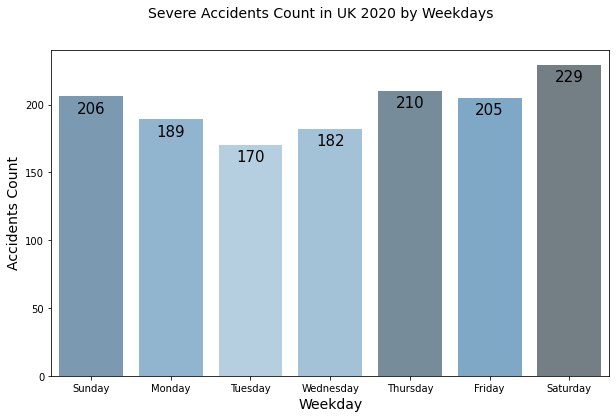

In [13]:
plt.figure(figsize=(10, 6))

x=by_day_1['weekday']
y=by_day_1['accident_severity']

splot=sns.barplot(x,y, data=by_day_1,
                 # manually set the order of the columns
                 order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], hue=y, palette="Blues_d", dodge=False, alpha=0.7)

#put annotations opnto the bars
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

plt.xlabel("Weekday", size=14)
plt.ylabel("Accidents Count", size=14)
plt.suptitle('Severe Accidents Count in UK 2020 by Weekdays', size=14)
plt.legend([],[], frameon=False)
plt.show()

The plot shows a `major dominance of number of severe accidents on Saturdays`. People go seek for entertainment and drive not careful / drunk? 

Let's check what hourly breakdown will show:

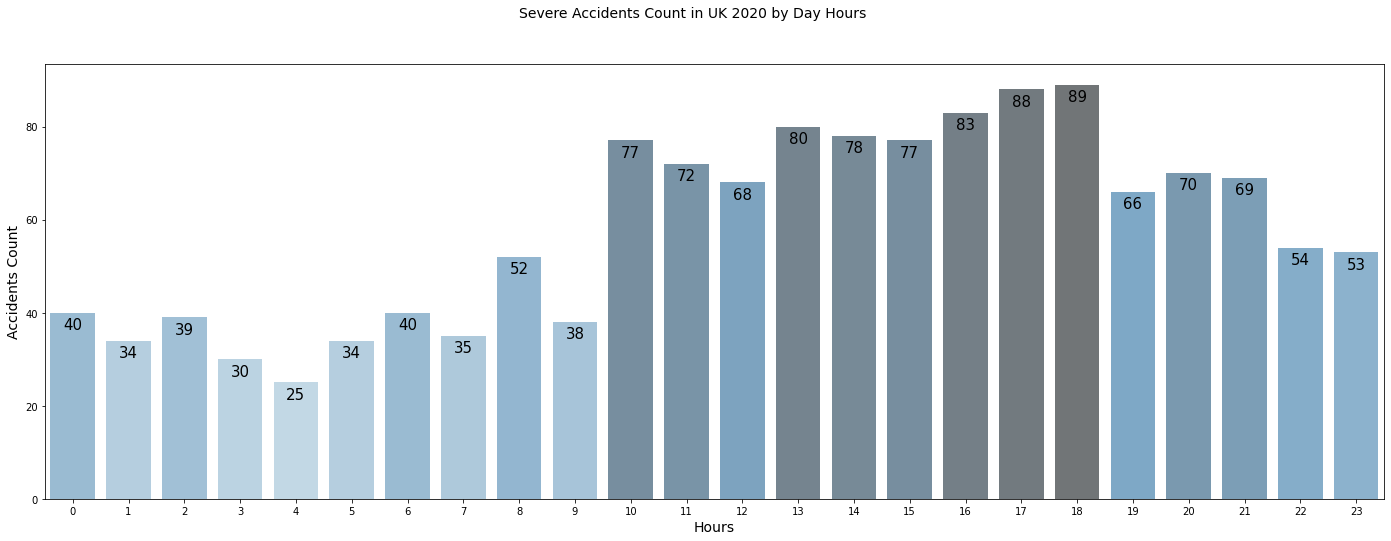

In [14]:
plt.figure(figsize=(24, 8))
x=by_hour_1['hours']
y=by_hour_1['accident_severity']

splot=sns.barplot(x, y, data=by_hour_1, hue=y, palette="Blues_d", dodge=False, alpha=0.7)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
    
plt.xlabel("Hours", size=14)
plt.ylabel("Accidents Count", size=14)
plt.suptitle('Severe Accidents Count in UK 2020 by Day Hours', size=14)
plt.legend([],[], frameon=False)
plt.show()

The time of the biggest number of severe accidents is `5 to 7 p.m.` Quite likely it's the time when people return home from the offices for the working days and also the time when people go for entertainment on weekends.

<div class="alert alert-success">
<b>Conclusion for Section 2</b>:  <a class="anchor" id="second-zero-bullet"></a>

Combining the results from the two graphs, the period of the mosts severe accidents number would be: `Saturday evening between 17 and 19 hrs`

[To Start of Section...](#second-bullet)

[To Table of Contents...](#zero-bullet)

# 3. Are there any patterns in the time of day/ day of the week when serious accidents occur?  <a class="anchor" id="third-bullet"></a>

<div class="alert alert-block alert-info">
In order to answer this question let us create a heatmap showing all days and all hours in one graph. First we'll create a sliced dataframe and preview it:

In [15]:
accidents_sev_time_heatmap = accidents_sev_time_1[['weekday','hours','accident_severity']]
accidents_sev_time_heatmap = accidents_sev_time_heatmap.pivot_table(
    index='weekday',
    columns='hours',
    values='accident_severity',
    aggfunc='count',)

order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
accidents_sev_time_heatmap = accidents_sev_time_heatmap.reindex(index=order)
accidents_sev_time_heatmap.head(7)

hours,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Sunday,9.0,16.0,12.0,8.0,2.0,5.0,6.0,2.0,5.0,6.0,...,16.0,11.0,13.0,11.0,11.0,4.0,8.0,10.0,2.0,3.0
Monday,3.0,1.0,3.0,3.0,3.0,2.0,7.0,5.0,10.0,6.0,...,11.0,15.0,16.0,17.0,10.0,8.0,9.0,8.0,7.0,9.0
Tuesday,4.0,3.0,2.0,3.0,6.0,5.0,2.0,5.0,10.0,2.0,...,10.0,7.0,10.0,14.0,16.0,13.0,9.0,7.0,5.0,4.0
Wednesday,5.0,5.0,2.0,2.0,1.0,7.0,4.0,5.0,5.0,7.0,...,14.0,12.0,11.0,7.0,11.0,10.0,4.0,9.0,8.0,4.0
Thursday,8.0,4.0,6.0,4.0,3.0,6.0,6.0,4.0,7.0,6.0,...,7.0,8.0,10.0,10.0,14.0,8.0,12.0,10.0,13.0,11.0
Friday,2.0,5.0,6.0,5.0,6.0,2.0,9.0,11.0,11.0,7.0,...,13.0,11.0,8.0,15.0,11.0,10.0,14.0,8.0,7.0,9.0
Saturday,9.0,NaN,8.0,5.0,4.0,7.0,6.0,3.0,4.0,4.0,...,7.0,13.0,15.0,14.0,16.0,13.0,14.0,17.0,12.0,13.0


<div class="alert alert-block alert-warning">
    
**`BY THE WAY`** we found that there is no data on accident severity = 1 on Saturday 1 hrs a.m. While it could be the data inconsistency, it could also be a good sign: at least some period has no severe accidents!

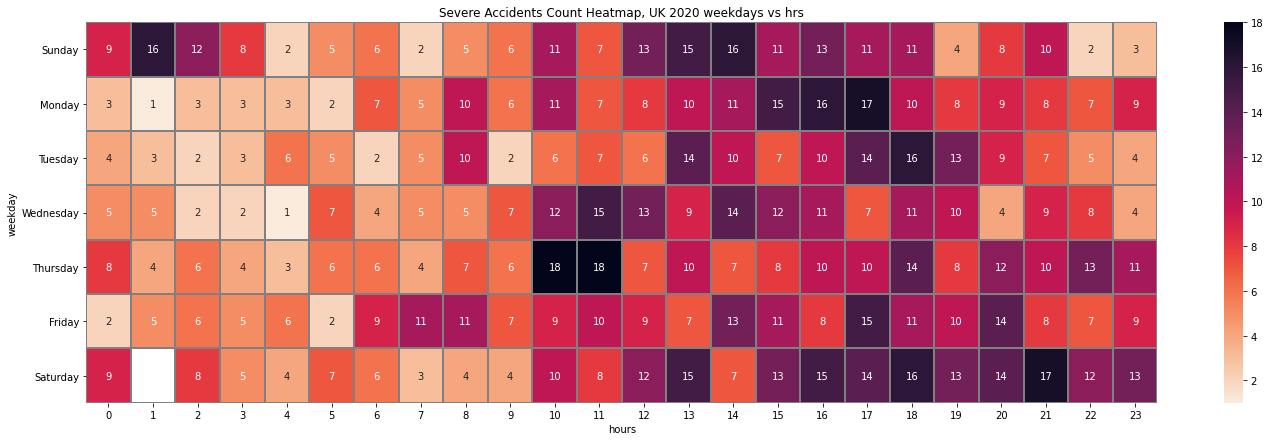

In [16]:
plt.figure(figsize=(24, 7))
plt.title('Severe Accidents Count Heatmap, UK 2020 weekdays vs hrs')
sns.heatmap(accidents_sev_time_heatmap, annot=True, fmt='.0f', linewidths=1, linecolor='gray', cmap = sns.cm.rocket_r);

**Based on the data and the visuals we can see the following patterns for severe accidents:**
- most accidents in general happen in the `afternoon / evening`;
- the severe accidents rate is definitely `higher on Saturday`;
- the severe accidents rate is definitely `lower at night time` but also `check that Sunday night!`;
- for some reason there is a peak of severe accidents on `Tuesdays at 10-11 hrs`. Whatever could be the reason?
- there is a tendency that in the first half of the week severe accidents happen `earlier` than on the second half of the week;
- the most stressful day is `Saturday` in afternoon and till late at night.

<div class="alert alert-success">
<b>Conclusion for Section 3</b>:  <a class="anchor" id="third-zero-bullet"></a>

In general, most of the accidents happen in the afternoon. The most stressful day is `Saturday` in afternoon and till late at night. Please see the rest of peculiar patterns in the paragraph above.

[To Start of Section...](#third-bullet)

[To Table of Contents...](#zero-bullet)

# 4. What characteristics stand out in serious accidents compared with other accidents?  <a class="anchor" id="fourth-bullet"></a>

<div class="alert alert-block alert-info">
In order to answer this question we could create diagrams of the characteristics and compare the distributions between the accident severity types. There are 16 (mostly categorical) columns. 

It's not reasonable comparing the number of fatal accidents with the number of slight accidents: obviously we'll have a lower count for Severity 1. What we need is `comparing a percentage share of accidents` with certain conditions involved.

First selecting the required columns and forming the dataframe:

In [17]:
accidents = accidents[['accident_severity',	'number_of_vehicles', 'number_of_casualties',	
                       'first_road_class',	'road_type',	
                       'speed_limit',	'junction_detail',	'junction_control',	
                       'second_road_class',	'pedestrian_crossing_human_control',	'pedestrian_crossing_physical_facilities',	
                       'light_conditions',	'weather_conditions',	'road_surface_conditions',	
                       'special_conditions_at_site',	'carriageway_hazards',	'urban_or_rural_area']]
accidents.head()

,accident_severity,number_of_vehicles,number_of_casualties,first_road_class,road_type,speed_limit,junction_detail,junction_control,second_road_class,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,3,1,1,6,6,20,0,-1,6,9,9,1,9,9,0,0,1
1,3,1,2,3,6,20,9,2,6,0,4,1,1,1,0,0,1
2,3,1,1,5,6,30,3,1,6,0,0,4,1,2,0,0,1
3,2,1,1,3,6,30,0,-1,6,0,4,4,1,1,0,0,1
4,3,1,2,3,6,30,3,4,5,0,0,4,1,1,0,0,1


Let's make three slices as per the severity type:

In [18]:
sev_1_hist = accidents.query('accident_severity == 1')
sev_2_hist = accidents.query('accident_severity == 2')
sev_3_hist = accidents.query('accident_severity == 3')

Now we run a groupby aggregation by counting the cases and calculating the percentage of cases from total cases in the category. We'd also better exclude minor percentage volumes: let's cut off `every share of less than 10 percents`. 

In [19]:
df_list = []
def create_dfs(df):
    for col in df.columns[1:]:
        dataframe = df[['accident_severity', col]]
        dataframe = dataframe.groupby(['accident_severity',col]).agg({col : ['count']}).reset_index()
        dataframe.columns = ['accident_severity', col, 'count']
        dataframe['percentage'] = (dataframe['count'] / dataframe['count'].sum())*100
        dataframe = dataframe.query('percentage >= 10')
        df_list.append(dataframe)
    return df_list

for df in [sev_1_hist, sev_2_hist, sev_3_hist]:
    create_dfs(df)

Now we will create dedicated tables with the percentage of the required characteristics grouped by Severity Rate. I marked some tables as `#NOT SIGNIFICANT` since they show nearly the same distribution for different severity. As you can see I join every 16th table from the previously generated file.

In [20]:
number_of_vehicles = df_list[0].append(df_list[16],ignore_index=True).append(df_list[32],ignore_index=True)
number_of_casualties = df_list[1].append(df_list[17],ignore_index=True).append(df_list[33],ignore_index=True)
first_road_class = df_list[2].append(df_list[18],ignore_index=True).append(df_list[34],ignore_index=True)
road_type = df_list[3].append(df_list[19],ignore_index=True).append(df_list[35],ignore_index=True)
speed_limit = df_list[4].append(df_list[20],ignore_index=True).append(df_list[36],ignore_index=True)
junction_detail = df_list[5].append(df_list[21],ignore_index=True).append(df_list[37],ignore_index=True)
junction_control = df_list[6].append(df_list[22],ignore_index=True).append(df_list[38],ignore_index=True)
second_road_class = df_list[7].append(df_list[23],ignore_index=True).append(df_list[39],ignore_index=True)
pedestrian_crossing_human_control = df_list[8].append(df_list[24],ignore_index=True).append(df_list[40],ignore_index=True) #NOT SIGNIFICANT
pedestrian_crossing_physical_facilities = df_list[9].append(df_list[25],ignore_index=True).append(df_list[41],ignore_index=True)
light_conditions = df_list[10].append(df_list[26],ignore_index=True).append(df_list[42],ignore_index=True)
weather_conditions = df_list[11].append(df_list[27],ignore_index=True).append(df_list[43],ignore_index=True)
road_surface_conditions = df_list[12].append(df_list[28],ignore_index=True).append(df_list[44],ignore_index=True)
special_conditions_at_site = df_list[13].append(df_list[29],ignore_index=True).append(df_list[45],ignore_index=True) #NOT SIGNIFICANT
carriageway_hazards = df_list[14].append(df_list[30],ignore_index=True).append(df_list[46],ignore_index=True) #NOT SIGNIFICANT
urban_or_rural_area = df_list[15].append(df_list[31],ignore_index=True).append(df_list[47],ignore_index=True)

With these individual characteristics table we can create visuals for easier analysis. We will use `Seaborn library` for that. The visuals are divided into two batches.

<div class="alert alert-block alert-info">
The required range of values (severity = fatal) is shown in BLUE. 

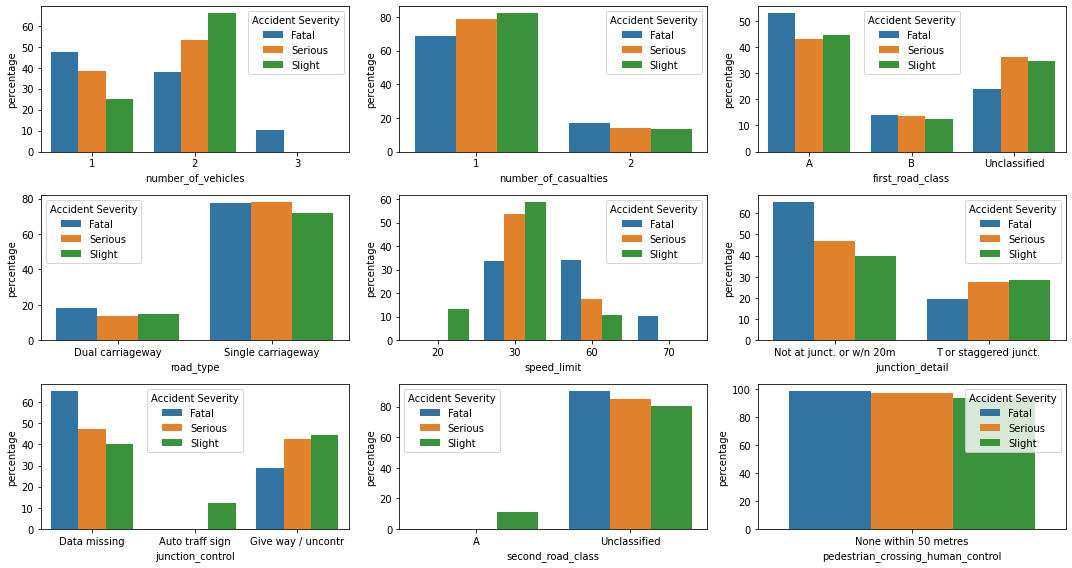

In [21]:
fig = plt.figure(figsize=(15, 8))

labels=["Fatal","Serious", "Slight"]

ax1 = fig.add_subplot(331)
ax1 = sns.barplot(x=number_of_vehicles['number_of_vehicles'], y=number_of_vehicles['percentage'], hue=number_of_vehicles['accident_severity'])
h, l = ax1.get_legend_handles_labels()
ax1.legend(h, labels, title="Accident Severity")

ax2 = fig.add_subplot(332)
ax2 = sns.barplot(x=number_of_casualties['number_of_casualties'], y=number_of_casualties['percentage'], hue=number_of_casualties['accident_severity'])
h, l = ax2.get_legend_handles_labels()
ax2.legend(h, labels, title="Accident Severity")

ax3 = fig.add_subplot(333)
ax3 = sns.barplot(x=first_road_class['first_road_class'], y=first_road_class['percentage'], hue=first_road_class['accident_severity'])
h, l = ax3.get_legend_handles_labels()
ax3.legend(h, labels, title="Accident Severity")
ax3 = ax3.set_xticklabels(["A","B", "Unclassified"])

ax4 = fig.add_subplot(334)
ax4 = sns.barplot(x=road_type['road_type'], y=road_type['percentage'], hue=road_type['accident_severity'])
h, l = ax4.get_legend_handles_labels()
ax4.legend(h, labels, title="Accident Severity")
ax4 = ax4.set_xticklabels(["Dual carriageway","Single carriageway"])

ax5 = fig.add_subplot(335)
ax5 = sns.barplot(x=speed_limit['speed_limit'], y=speed_limit['percentage'], hue=speed_limit['accident_severity'])
h, l = ax5.get_legend_handles_labels()
ax5.legend(h, labels, title="Accident Severity")

ax6 = fig.add_subplot(336)
ax6 = sns.barplot(x=junction_detail['junction_detail'], y=junction_detail['percentage'], hue=junction_detail['accident_severity'])
h, l = ax6.get_legend_handles_labels()
ax6.legend(h, labels, title="Accident Severity")
ax6 = ax6.set_xticklabels(["Not at junct. or w/n 20m","T or staggered junct."])

ax7 = fig.add_subplot(337)
ax7 = sns.barplot(x=junction_control['junction_control'], y=junction_control['percentage'], hue=junction_control['accident_severity'])
h, l = ax7.get_legend_handles_labels()
ax7.legend(h, labels, title="Accident Severity",loc='upper center')
ax7 = ax7.set_xticklabels(["Data missing","Auto traff sign", "Give way / uncontr"])

ax8 = fig.add_subplot(338)
ax8 = sns.barplot(x=second_road_class['second_road_class'], y=second_road_class['percentage'], hue=second_road_class['accident_severity'])
h, l = ax8.get_legend_handles_labels()
ax8.legend(h, labels, title="Accident Severity",loc='upper left')
ax8 = ax8.set_xticklabels(["A", "Unclassified"])

ax9 = fig.add_subplot(339)
ax9 = sns.barplot(x=pedestrian_crossing_human_control['pedestrian_crossing_human_control'], 
                  y=pedestrian_crossing_human_control['percentage'], 
                  hue=pedestrian_crossing_human_control['accident_severity'])
h, l = ax9.get_legend_handles_labels()
ax9.legend(h, labels, title="Accident Severity")
ax9 = ax9.set_xticklabels(["None within 50 metres"])

fig.tight_layout()

plt.show()

**What of peculiar we can see from the plots:**
- Fatal accidents happen more often `without involving another car` (only a driver and his passengers suffer). However there is still some peak of the three cars number which is very peculiar for fatal accidents;
- Slightly more often the number of casualties is `two persons`;
- Most fatal accidents happen of `Class A roads`;
- Slightly more often fatal accidents happen on `dual carriageway roads`;
- As for speed limit: you could expect that fatal accidents happen more often on the roads with `higher speed limit` (60-70 mph);
- More often fatal accidents happen `outside of junctions`;
- As for junctions control measures: we have a batch of missing data but since we learned that most fatal accidents happen where there are no junctions in vicinity, we can ignore this problem for the time;
- Slightly more often fatal accidents happen at `unclassified second roads`.
- Some tables show neraly same share of accidents for the different severity - for example, 'pedestrian crossing human control' visual. No need to analyze these.

This is all for the first portion. Let's visualize the second batch:

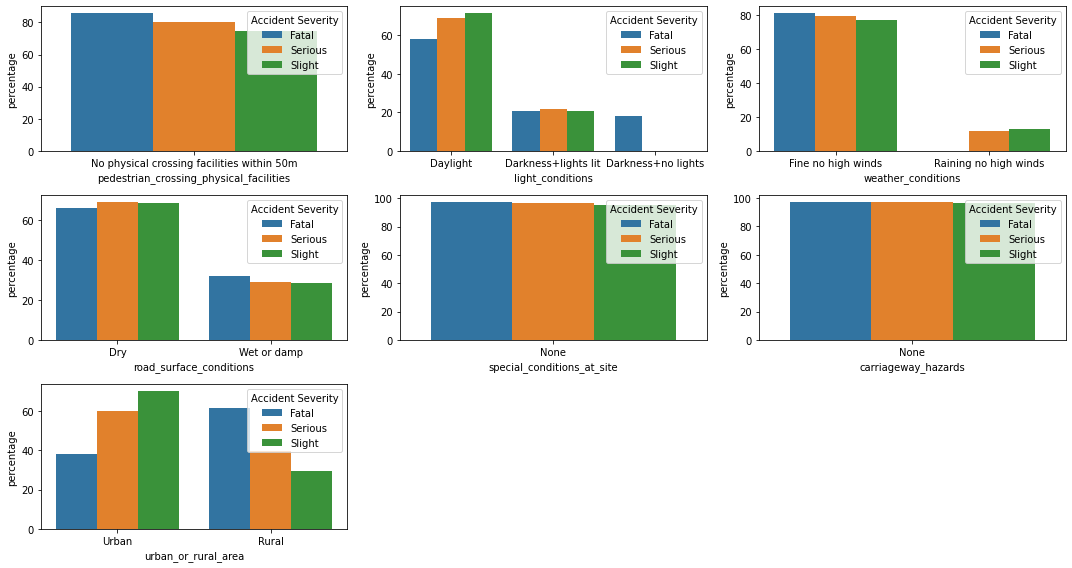

In [22]:
fig = plt.figure(figsize=(15, 8))

labels=["Fatal","Serious", "Slight"]

ax1 = fig.add_subplot(331)
ax1 = sns.barplot(x=pedestrian_crossing_physical_facilities['pedestrian_crossing_physical_facilities'], 
                  y=pedestrian_crossing_physical_facilities['percentage'], hue=pedestrian_crossing_physical_facilities['accident_severity'])

ax1.legend(h, labels, title="Accident Severity")
h, l = ax1.get_legend_handles_labels()
ax1 = ax1.set_xticklabels(["No physical crossing facilities within 50m"])

ax2 = fig.add_subplot(332)
ax2 = sns.barplot(x=light_conditions['light_conditions'], y=light_conditions['percentage'], hue=light_conditions['accident_severity'])
ax2.legend(h, labels, title="Accident Severity",loc='upper right')
h, l = ax2.get_legend_handles_labels()
ax2 = ax2.set_xticklabels(["Daylight","Darkness+lights lit","Darkness+no lights"])

ax3 = fig.add_subplot(333)
ax3 = sns.barplot(x=weather_conditions['weather_conditions'], y=weather_conditions['percentage'], hue=weather_conditions['accident_severity'])
ax3.legend(h, labels, title="Accident Severity")
h, l = ax3.get_legend_handles_labels()
ax3 = ax3.set_xticklabels(["Fine no high winds","Raining no high winds"])

ax4 = fig.add_subplot(334)
ax4 = sns.barplot(x=road_surface_conditions['road_surface_conditions'], y=road_surface_conditions['percentage'], hue=road_surface_conditions['accident_severity'])
ax4.legend(h, labels, title="Accident Severity")
h, l = ax4.get_legend_handles_labels()
ax4 = ax4.set_xticklabels(["Dry","Wet or damp"])

ax5 = fig.add_subplot(335)
ax5 = sns.barplot(x=special_conditions_at_site['special_conditions_at_site'], 
                  y=special_conditions_at_site['percentage'], hue=special_conditions_at_site['accident_severity'])
ax5.legend(h, labels, title="Accident Severity")
h, l = ax5.get_legend_handles_labels()
ax5 = ax5.set_xticklabels(["None"])

ax6 = fig.add_subplot(336)
ax6 = sns.barplot(x=carriageway_hazards['carriageway_hazards'], y=carriageway_hazards['percentage'], hue=carriageway_hazards['accident_severity'])
ax6.legend(h, labels, title="Accident Severity")
h, l = ax6.get_legend_handles_labels()
ax6 = ax6.set_xticklabels(["None"])

ax7 = fig.add_subplot(337)
ax7 = sns.barplot(x=urban_or_rural_area['urban_or_rural_area'], 
                  y=urban_or_rural_area['percentage'], 
                  hue=urban_or_rural_area['accident_severity'])

ax7.legend(h, labels, title="Accident Severity")
h, l = ax7.get_legend_handles_labels()
ax7 = ax7.set_xticklabels(["Urban","Rural"])

fig.tight_layout()

plt.show()

**What of peculiar we can see from the plots:**
- Slightly more often fatal accidents happen at spots with `no pedestrian crossing facilities`;
- More often fatal accidents happen `at dark time with no lighting` along the road;
- Not sure if this is of any significance but slightly more often fatal accidents happen at `fine road conditions with no winds`;
- Slightly more often fatal accidents happen at `wet/damp roads`;
- It's quite obvious that most fatal accidents happen at `rural road sections`.

**Now we can write down most prominent features of fatal accidents:**

<div class="alert alert-success">
<b>Conclusion for Section 4</b>:  <a class="anchor" id="fourth-zero-bullet"></a>

- Fatal accidents tend to happen at `rural sections` with `only one vehicle` involved or with three cars;
- Fatal accidents happen at `straight` road sections, with `no junctions / traffic light / pedestrian crossing facilitie`s; 
- Some other accompanying factors are `higher speed limit`, `dark time` with no lighting and a bit `wet road`;
- From the previous section we should also remember the most intensive time: `Saturday night`. So probably this could be a person driving to his/her countryhouse from the party in the city (or reverse: planning the night entertainment in the city). Sometimes such driving leads to a clash of three cars.

[To Start of Section...](#fourth-bullet)

[To Table of Contents...](#zero-bullet)

# 5. On what areas would you recommend the planning team focus their brainstorming efforts to reduce serious accidents?   <a class="anchor" id="fifth-bullet"></a>

<div class="alert alert-block alert-info">
Based on the above investigation we would like to suggest the following focus areas:

<div class="alert alert-success">
    
- <b>Focus on rural areas, straight two-carriage roads unonbstructed with junctions and pedestrian / traffic light facilities</b>, this is where most of the severe accidents tend to happen;
- <b>Focus on the speed limit</b>: the study shows obvious relation of the higher speed limit and share of severe accidents;
- Focus on the <b>lighting conditions</b>, is there anything that can be improved;
- As most cases of severe accidents happen on <b>Saturday night</b>, check if any safety measures could be implemented on that exact period;
- Need to study the background of <b>Thursday period 10 to 11 hrs</b>, what could be the reason of that increase of a number of severe accidents. Any potential activity in this period?
- Need to study the background of <b>Sunday night 1 to 2 a.m.</b>, what could be the reason of that increase of a number of severe accidents;
- Focus on tendency of <b>time shift of accidents</b>: the older the week, the later severe accidents happen.

[To Table of Contents...](#zero-bullet)

[`(с) slasaru 2021`](mailto:slasaru@gmail.com)